In [9]:
import pandas as pd 
import matplotlib.pyplot as plt


In [10]:
lotto = pd.read_csv("./output/merged_lotto.csv")

lotto_plus = pd.read_csv("./output/merged_lottoplus.csv")

mini_lotto = pd.read_csv("./output/mini_lotto.csv")


In [11]:
print(lotto.head())

   number        date            numbers  szostka_count  szostka_value  \
0      47  22-12-1957   8,15,24,27,37,46              0            0.0   
1      46  15-12-1957   7,12,19,36,42,49              0            0.0   
2      45  08-12-1957  11,17,24,35,42,47              0            0.0   
3      44  01-12-1957    5,8,14,26,32,44              0            0.0   
4      43  24-11-1957    2,6,18,20,40,49              0            0.0   

   piatka_count  piatka_value  czworka_count  czworka_value  trojka_count  \
0             0           0.0              0            0.0             0   
1             0           0.0              0            0.0             0   
2             0           0.0              0            0.0             0   
3             0           0.0              0            0.0             0   
4             0           0.0              0            0.0             0   

   trojka_value  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4 

In [17]:
def count_winnings_by_year(dataset):
    dataset['date'] = pd.to_datetime(dataset['date'], format='%d-%m-%Y')    
    dataset['year'] = dataset['date'].dt.year
    
    result = dataset.groupby('year').agg({
        'szostka_count': 'sum',
        'piatka_count': 'sum',
        'czworka_count': 'sum',
        'trojka_count': 'sum'
    }).reset_index()
    
    result["total"] = result["szostka_count"] + result["piatka_count"] + result["czworka_count"] + result["trojka_count"]
    return result


In [18]:
lotto_count_winnings_by_year = count_winnings_by_year(lotto)
mini_lotto_count_winnings_by_year = count_winnings_by_year(mini_lotto)
lotto_plus_count_winnings_by_year = count_winnings_by_year(lotto_plus)

In [21]:
def get_plot_total_wins_by_year(data) -> None:
    x = data["year"]
    y = data["total"]

    plt.plot(x, y)    
    plt.show()

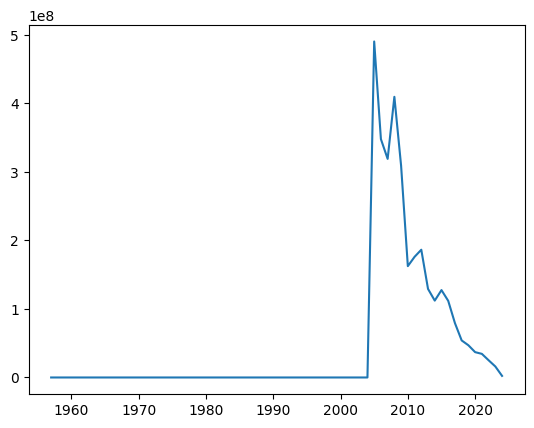

In [22]:
get_plot_total_wins_by_year(lotto_count_winnings_by_year)

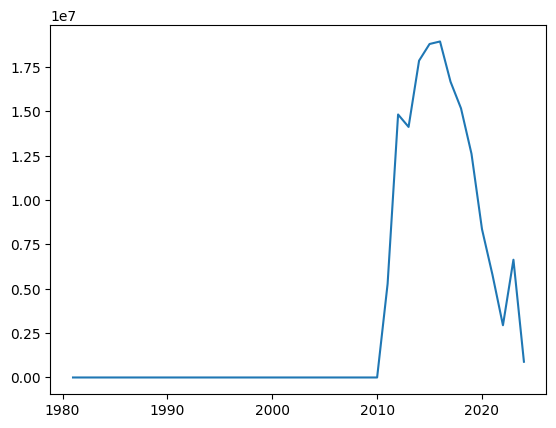

In [23]:
get_plot_total_wins_by_year(mini_lotto_count_winnings_by_year)

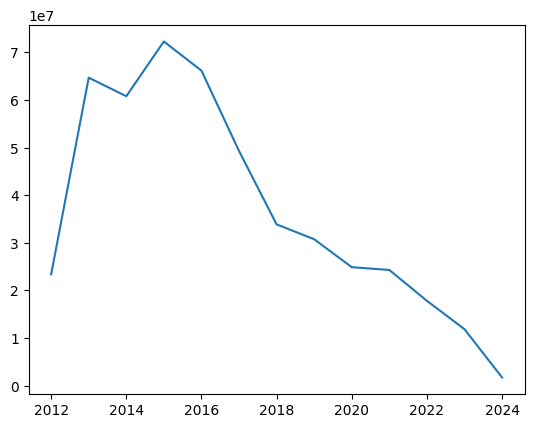

In [24]:
get_plot_total_wins_by_year(lotto_plus_count_winnings_by_year)